In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
data = pd.read_csv('./data.csv')

In [5]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
data.drop(['id', 'Unnamed:32'], axis=1, inplace=True)

In [8]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

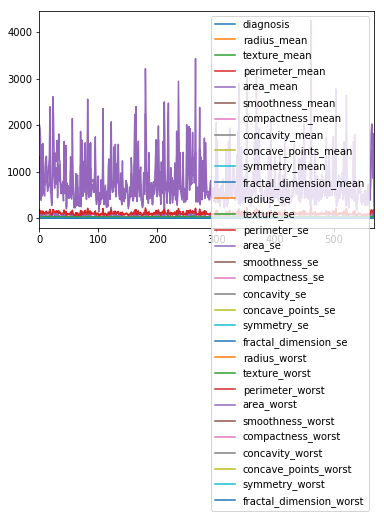

In [9]:
data.plot()

In [10]:
data_scaled = pd.DataFrame(preprocessing.scale(data.iloc[:,1:])) # standard-scaled

In [11]:
data_scaled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


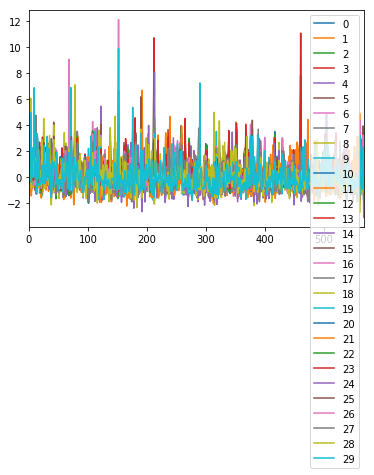

In [12]:
data_scaled.plot()

In [13]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

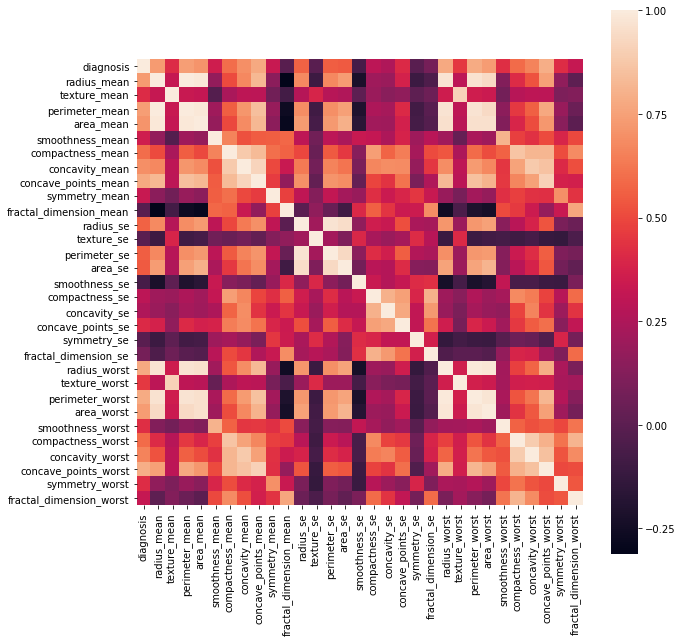

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmax=1, square=True)

In [15]:
data_scaled.columns = list(data.columns[1:])

In [16]:
data_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [17]:
mean_cols = [c for c in data_scaled.columns if 'mean' in c]

In [18]:
data_scaled_means = data_scaled[mean_cols]

In [19]:
data_scaled_means

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096


In [20]:
X = data_scaled_means
y = data.diagnosis.values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
len(y_train)

455

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [24]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.9123
Misclassified samples: 10


In [25]:
y_pred = knn.predict(X_train)
print(accuracy_score(y_train, y_pred))

0.9582417582417583


In [26]:
confusion_matrix(y_train, y_pred)

array([[283,   5],
       [ 14, 153]], dtype=int64)

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [199]:
dcstc = DecisionTreeClassifier()
dcstc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [210]:
y_pred = dcstc.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.8772
Misclassified samples: 14


In [212]:
confusion_matrix(y_test, y_pred)

array([[51, 10],
       [ 4, 49]], dtype=int64)

In [213]:
y_pred = dcstc.predict(X_train)
print(accuracy_score(y_train, y_pred))

1.0


In [214]:
confusion_matrix(y_train, y_pred)

array([[296,   0],
       [  0, 159]], dtype=int64)

In [202]:
cross_val_score(dcstc, X_train, y_train, cv=10).mean()

0.9188866930171278

In [203]:
cross_val_score(dcstc, X_test, y_test, cv=10).mean()

0.8966200466200467

In [204]:
dcstc.feature_importances_

array([0.        , 0.10882135, 0.03443507, 0.04324456, 0.01326096,
       0.0264135 , 0.00953247, 0.75865671, 0.        , 0.00563538])

In [205]:
data_scaled_means.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [206]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


feature_cols=[col for col in data_scaled.columns if 'mean' in col]

dot_data = StringIO()
export_graphviz(dcstc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\alexy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [215]:
y_pred = rfc.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.9298
Misclassified samples: 8


In [216]:
confusion_matrix(y_test, y_pred)

array([[56,  5],
       [ 3, 50]], dtype=int64)

In [218]:
y_pred = rfc.predict(X_train)
print(accuracy_score(y_train, y_pred))

0.9978021978021978


In [219]:
confusion_matrix(y_train, y_pred)

array([[296,   0],
       [  1, 158]], dtype=int64)

In [190]:
cross_val_score(rfc, X_train, y_train, cv=10).mean()

0.9231335090030741

In [191]:
cross_val_score(rfc, X_test, y_test, cv=10).mean()

0.9063519813519813

In [192]:
rfc.feature_importances_

array([0.14397201, 0.06097472, 0.03965309, 0.15705084, 0.0202833 ,
       0.0364967 , 0.09947197, 0.39772356, 0.01818089, 0.02619291])

In [196]:
for i in range(1,10):
    dcstc = DecisionTreeClassifier(max_depth=i)
    score=cross_val_score(dcstc, X_train, y_train, cv=10).mean()
    print(i, score)

1 0.9167632850241546
2 0.9208651734738693
3 0.9343478260869565
4 0.929852876592007
5 0.9253601229688186
6 0.9188866930171278
7 0.9189833113746158
8 0.9123166447079492
9 0.9144883618796662


array([[51, 10],
       [ 4, 49]], dtype=int64)